# Further analysis of MTF results

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [18]:
def mtf_ft_plot(freqs, MTF, in_focus, f_number):
    t_freqs = freqs[:len(freqs)//2]
    t_MTF = MTF[in_focus][:len(MTF[in_focus])//2]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(t_freqs, t_MTF)
    ax[0].set_title(f'in-focus MTF at f/{f_number}')
    ax[0].set_xlabel('line pairs per millimetre')

    N = len(t_freqs)
    T = np.mean(np.diff(t_freqs))

    yf = fft(t_MTF)
    xf = fftfreq(N, T)
    ax[1].plot(xf*1000, 2.0/N * np.abs(yf), '.')
    ax[1].set_title('FT(MTF)')
    ax[1].set_xlim(-100, 100)
    ax[1].set_xlabel('distance (microns)')
    plt.show()

def mtf_contour(freqs, pos, MTF, f_number):
    plt.contourf(freqs, pos, MTF, 100, cmap=plt.cm.get_cmap("Greens", 10))
    plt.xlim(0, 0.5 / 6.45e-3)
    plt.xlabel("line pairs per mm")
    plt.ylabel("Defocus (mm)")
    plt.title(f"MTF versus defocus at f/{f_number}")
    plt.colorbar(ticks=list(np.linspace(0, 1, 11)))
    plt.show()

In [13]:
in_focus = 12

In [14]:
f_number = 6

with open('mtfs/f6_mtf.pickle', 'rb') as f:
    freqs, pos, MTF = pickle.load(f)

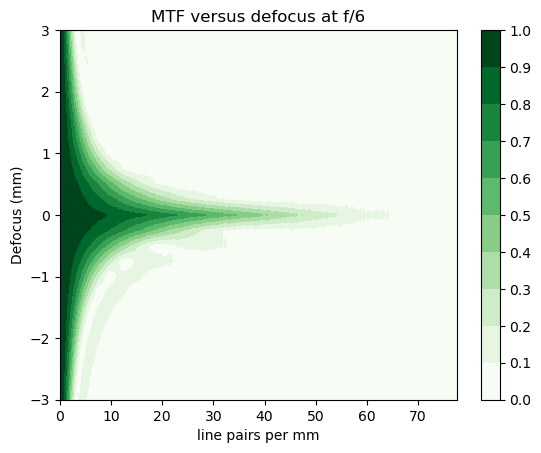

In [19]:
mtf_contour(freqs, pos, MTF, 6)

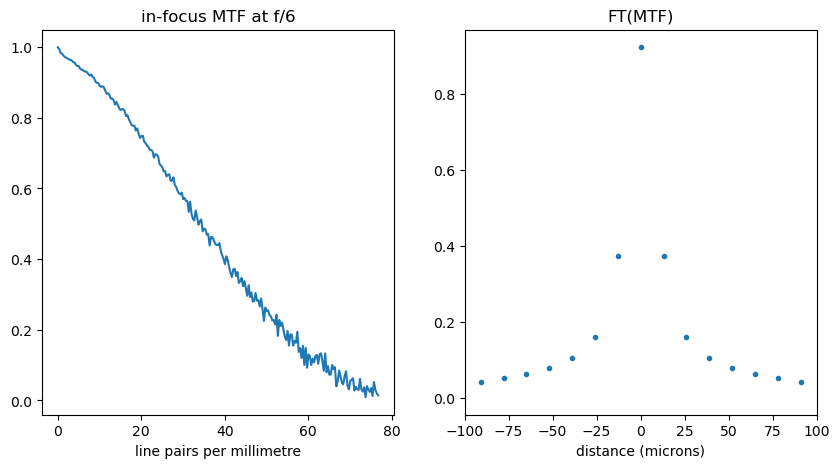

In [15]:
mtf_ft_plot(freqs, MTF, in_focus, 6)